In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("C://Users//Sahil//HR Internship//HRDataset_v14.csv")
df.head(9)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4


In [4]:
#Check for missing values
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [5]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [8]:
df.sample(7)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
289,"Veera, Abdellah",10014,0,2,1,5,5,4,0,58523,...,Kissy Sullivan,20.0,LinkedIn,Exceeds,4.5,5,0,2/1/2016,0,15
131,"Houlihan, Debra",10272,1,1,0,1,6,3,0,180000,...,Janet King,2.0,LinkedIn,Fully Meets,4.5,4,0,1/21/2019,0,19
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.0,3,0,1/19/2016,0,7
84,"Estremera, Miguel",10280,0,0,1,4,5,2,0,60340,...,Michael Albert,22.0,Google Search,Needs Improvement,5.0,4,0,4/12/2018,5,16
43,"Chan, Lin",10210,0,0,0,1,5,3,0,54237,...,Elijiah Gray,16.0,Indeed,Fully Meets,3.3,4,0,2/19/2019,0,11
116,"Gosciminski, Phylicia",10218,0,3,0,3,5,3,0,66149,...,Kissy Sullivan,20.0,Google Search,Fully Meets,4.4,5,0,2/21/2019,0,1
71,"Dickinson, Geoff",10276,0,0,1,1,5,3,0,51259,...,Ketsia Liebig,19.0,Indeed,Fully Meets,4.3,4,0,2/19/2019,0,1


In [9]:
df.shape

(311, 36)

In [10]:
#interim report 2
target=df.pop('Salary')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


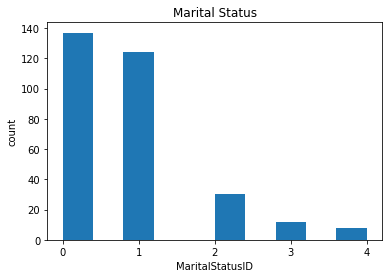

In [11]:
# check Marital status 

plt.hist (df['MaritalStatusID'])
plt.xlabel('MaritalStatusID')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (4,3)
plt.xticks(np.arange(0,5,1))
plt.title('Marital Status')
plt.show()

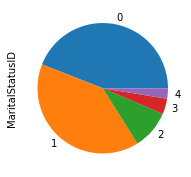

In [12]:
df['MaritalStatusID'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize'] = (7,7)
plt.show()

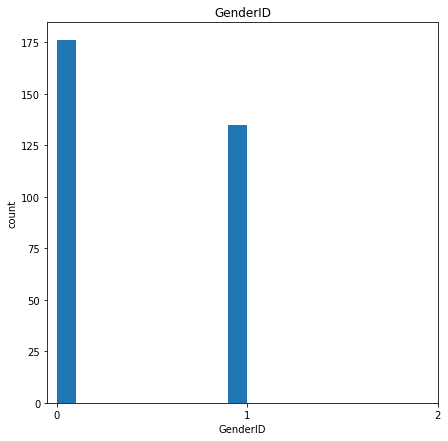

In [13]:
# check Gender


plt.hist (df['GenderID'])
plt.xlabel('GenderID')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (4,3)
plt.xticks(np.arange(0,3,1))
plt.title('GenderID')
plt.show()

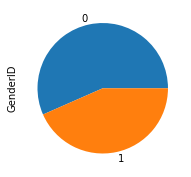

In [14]:
df['GenderID'].value_counts().plot(kind='pie')
plt.show()

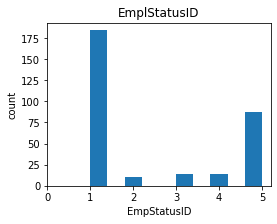

In [15]:
# Check EmpStatusID

plt.hist (df['EmpStatusID'])
plt.xlabel('EmpStatusID')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (4,3)
plt.xticks(np.arange(0,6,1))
plt.title('EmplStatusID')
plt.show()

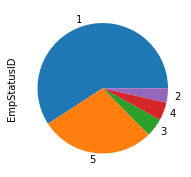

In [16]:
df['EmpStatusID'].value_counts().plot(kind='pie')
plt.show()

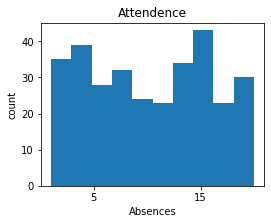

In [17]:
# Check Presence

plt.hist (df['Absences'])
plt.xlabel('Absences')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (4,3)
plt.xticks(np.arange(5,25,10))
plt.title('Attendence')
plt.show()

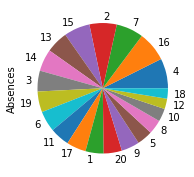

In [18]:
df['Absences'].value_counts().plot(kind='pie')
plt.show()

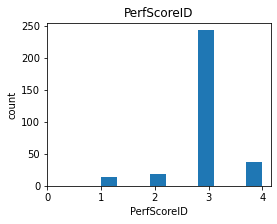

In [19]:
# Check PerfScoreID

plt.hist (df['PerfScoreID'])
plt.xlabel('PerfScoreID')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (4,3)
plt.xticks(np.arange(0,5,1))
plt.title('PerfScoreID')
plt.show()

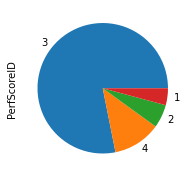

In [20]:
df['PerfScoreID'].value_counts().plot(kind='pie')
plt.show()

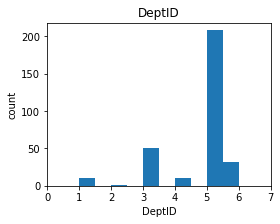

In [21]:
# check DeptID status 

plt.hist (df['DeptID'])
plt.xlabel('DeptID')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (4,3)
plt.xticks(np.arange(0,8,1))
plt.title('DeptID')
plt.show()

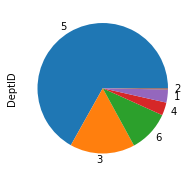

In [22]:
df['DeptID'].value_counts().plot(kind='pie')
plt.show()

In [23]:
sorted(df.columns)

['Absences',
 'CitizenDesc',
 'DOB',
 'DateofHire',
 'DateofTermination',
 'DaysLateLast30',
 'Department',
 'DeptID',
 'EmpID',
 'EmpSatisfaction',
 'EmpStatusID',
 'Employee_Name',
 'EmploymentStatus',
 'EngagementSurvey',
 'FromDiversityJobFairID',
 'GenderID',
 'HispanicLatino',
 'LastPerformanceReview_Date',
 'ManagerID',
 'ManagerName',
 'MaritalDesc',
 'MaritalStatusID',
 'MarriedID',
 'PerfScoreID',
 'PerformanceScore',
 'Position',
 'PositionID',
 'RaceDesc',
 'RecruitmentSource',
 'Sex',
 'SpecialProjectsCount',
 'State',
 'TermReason',
 'Termd',
 'Zip']

In [24]:
# converting textual columns to numeric

char_cols = df.dtypes.pipe(lambda x: x[x== 'object']).index
label_mapping = {}

for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])
    

In [25]:
# Removing columns with lesser significance [DaysLateLast30]

df = df.drop(columns=['DaysLateLast30'])
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,Absences
0,0,10026,0,0,1,1,5,4,0,0,...,0,0,22.0,0,0,4.60,5,0,0,1
1,1,10084,1,1,1,5,3,3,0,1,...,1,1,4.0,1,1,4.96,3,6,1,17
2,2,10196,1,1,0,5,5,3,0,1,...,0,2,20.0,0,1,3.02,3,0,2,3
3,3,10088,1,1,0,1,5,3,0,0,...,0,3,16.0,1,1,4.84,5,0,3,15
4,4,10069,0,2,0,5,5,3,0,1,...,0,4,39.0,2,1,5.00,4,0,4,2


In [26]:
# Removing columns with lesser significance [Employee Name]

df = df.drop(columns=['Employee_Name'])
df.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,Absences
0,10026,0,0,1,1,5,4,0,0,19,...,0,0,22.0,0,0,4.60,5,0,0,1
1,10084,1,1,1,5,3,3,0,1,27,...,1,1,4.0,1,1,4.96,3,6,1,17
2,10196,1,1,0,5,5,3,0,1,20,...,0,2,20.0,0,1,3.02,3,0,2,3
3,10088,1,1,0,1,5,3,0,0,19,...,0,3,16.0,1,1,4.84,5,0,3,15
4,10069,0,2,0,5,5,3,0,1,19,...,0,4,39.0,2,1,5.00,4,0,4,2


In [27]:
#converting textual columns to numeric

char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])
    
df.head()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,PositionID,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,Absences
0,10026,0,0,1,1,5,4,0,0,19,...,0,0,22.0,0,0,4.60,5,0,0,1
1,10084,1,1,1,5,3,3,0,1,27,...,1,1,4.0,1,1,4.96,3,6,1,17
2,10196,1,1,0,5,5,3,0,1,20,...,0,2,20.0,0,1,3.02,3,0,2,3
3,10088,1,1,0,1,5,3,0,0,19,...,0,3,16.0,1,1,4.84,5,0,3,15
4,10069,0,2,0,5,5,3,0,1,19,...,0,4,39.0,2,1,5.00,4,0,4,2


In [30]:
# since this is a binary classification we will use logistic regression

# normalize the data


scaler=StandardScaler()
df = scaler.fit_transform(df.values)

#split the data
x_train, x_test, y_train, y_test = train_test_split (df, target)

clf = LogisticRegression().fit(x_train, y_train)
pred = clf.predict(x_test)

print('training complete')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

training complete

In [ ]:
#generate report

print(classification_report (y_test, pred))